In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter


In [2]:
metadata = pd.read_csv("./../data/metadata_translations.tsv", sep = "\t", index_col=0)

In [3]:
metadata

,index,path,language,title,year,number_verses,number_chapters,number_books,source,file_name
0,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)
1,233,./../data/bibles/transformed_xml_with_year\SF_...,ALS,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALS_ALSSHQ1994EB_(ALBANIAN BIBLE...
2,162,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...
4,163,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...
...,...,...,...,...,...,...,...,...,...,...
215,101,/versions/Reina-Valera-Revisada-RVR/#booklist,SPA,Reina Valera Revisada (RVR1977),1977,31103,1189,66,biblegateway,Reina Valera Revisada (RVR1977)
216,102,/versions/Reina-Valera-1995-RVR1995-Biblia/#bo...,SPA,Reina-Valera 1995 (RVR1995),1995,31104,1189,66,biblegateway,Reina-Valera 1995 (RVR1995)
217,103,/versions/Reina-Valera-Antigua-RVA-Biblia/#boo...,SPA,Reina-Valera Antigua (RVA),1569,31101,1189,66,biblegateway,Reina-Valera Antigua (RVA)
218,104,/versions/Spanish-Blue-Red-Gold-Letter-Edition...,SPA,Spanish Blue Red and Gold Letter Edition (SRV-...,2014,31103,1189,66,biblegateway,Spanish Blue Red and Gold Letter Edition (SRV-...


In [4]:
metadata["language"].unique()

array(['ALB', 'ALS', 'ARA', 'AZB', 'BAQ', 'BEL', 'BLA', 'BUL', 'CEB',
       'CHA', 'CHI', 'CHU', 'CKB', 'COP', 'CZE', 'DAN', 'ENG', 'ESP',
       'FIN', 'FRE', 'GAE', 'GER', 'GLA', 'GOT', 'GRC', 'GRE', 'HAT',
       'HEB', 'HIN', 'HUN', 'ITA', 'JAM', 'KOR', 'LAT', 'MAR', 'NDS',
       'NL_', 'NOR', 'PON', 'POR', 'RUM', 'RUS', 'SCR', 'SHU', 'SPA',
       'SWA', 'SWE', 'SYR', 'TAM', 'TGL', 'THA', 'TUR', 'UND', 'VIE',
       'WIU', 'XKL', 'YBY', 'ZIA'], dtype=object)

In [5]:
len(metadata["language"].unique())


58

In [6]:
s = metadata.language.value_counts()

In [7]:
metadata[metadata.language.isin(s[s > 5].index)].language.unique().shape

(6,)

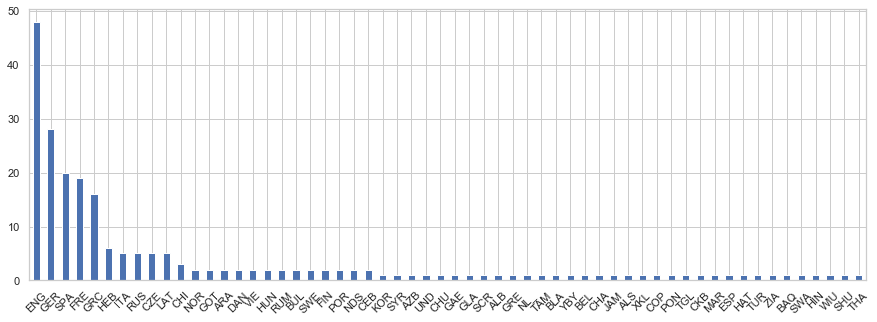

In [54]:
ax = metadata["language"].value_counts().sort_values(ascending=False).plot.bar(grid = True, figsize = (15,5), rot=45)
ax.set_axisbelow(True)


In [69]:
languages_df = pd.DataFrame(metadata["language"].value_counts())
languages_df.rename(columns ={"language" : "frequency"}, inplace=True)
languages_df.index.name='language-code'
languages_df

,frequency
language-code,
ENG,48
GER,28
SPA,20
FRE,19
GRC,16
HEB,6
LAT,5
ITA,5
CZE,5


In [70]:
languages_df.to_csv("./../data/languages.df", sep="\t")

In [63]:
languages_df

In [17]:
import seaborn as sns

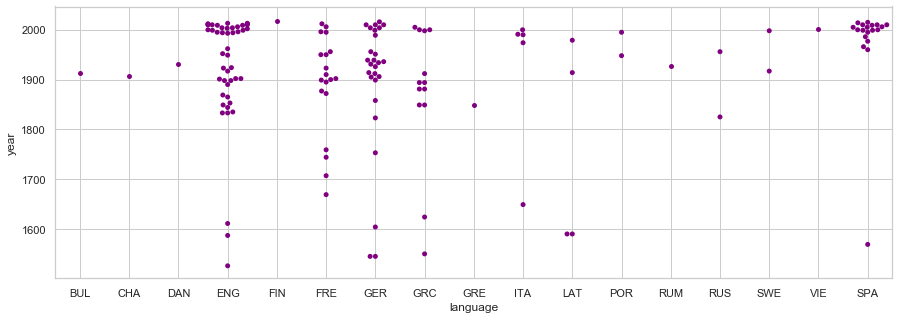

In [76]:
fig, ax = plt.subplots(figsize = (15,5))

#sns.set(style="whitegrid")
sns.swarmplot(y="year", x="language", data=metadata.loc[metadata["year"] > 1400], size=5, color="purple")

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


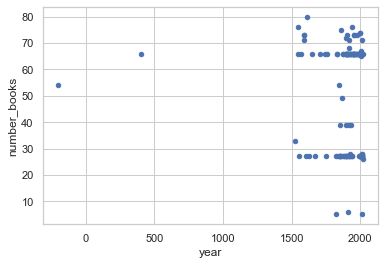

In [72]:
metadata.loc[metadata["year"] != 0].plot.scatter("year", "number_books")

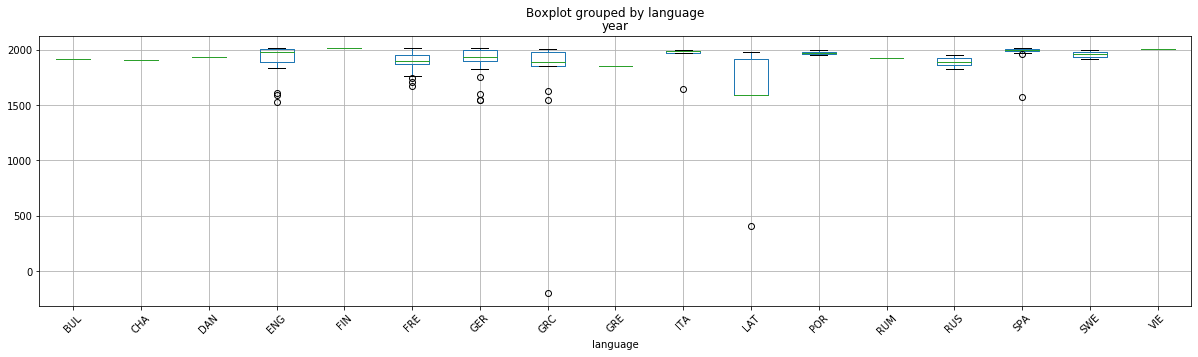

In [11]:
metadata.loc[metadata["year"]!=0].boxplot("year", by = "language", figsize=(20,5), rot=45)